<a href="https://colab.research.google.com/github/SahanUday/EN3150-Pattern-Recognition/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1 Linearregression impact on outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Book1.csv')

In [ ]:
data

,x,y
0,0,20.26
1,1,5.61
2,2,3.14
3,3,-30.00
4,4,-40.00
5,5,-8.13
6,6,-11.73
7,7,-16.08
8,8,-19.95
9,9,-24.03


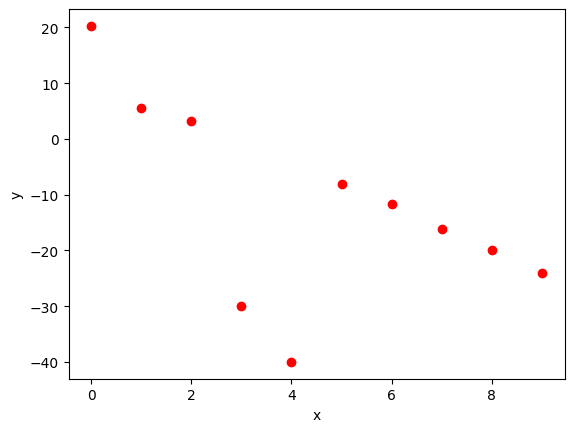

In [ ]:
plt.scatter(data.x,data.y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x=np.array(data.x)
y=np.array(data.y)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 20.26   5.61   3.14 -30.   -40.    -8.13 -11.73 -16.08 -19.95 -24.03]


In [ ]:
model=LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

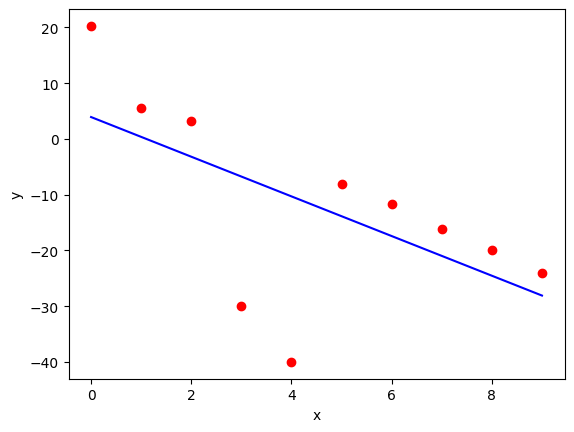

In [ ]:
plt.scatter(data.x,data.y,color='red')
m,c=model.coef_,model.intercept_
plt.plot(x,m*x+c,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
print(m)
print(c)

[-3.55727273]
3.916727272727277


In [ ]:
# Robust loss function
def robust_loss(y_true, y_pred, beta):
    r = y_true - y_pred
    r_sq = r**2
    terms = r_sq / (r_sq + beta**2)
    return np.mean(terms)

y_pred1 = -4 * x + 12
y_pred2 = -3.55 * x + 3.91

# Beta values to evaluate
betas = [1, 1e-6, 1000]

In [ ]:
# Calculate and display results
print("Robust Loss Results:")
print(f"{'Beta':<10} {'Model 1 Loss':<15} {'Model 2 Loss':<15}")
for beta in betas:
    loss1 = robust_loss(y, y_pred1, beta)
    loss2 = robust_loss(y, y_pred2, beta)
    print(f"{beta:<10} {loss1:<15.6f} {loss2:<15.6f}")

Robust Loss Results:
Beta       Model 1 Loss    Model 2 Loss   
1          0.435416        0.972847       
1e-06      1.000000        1.000000       
1000       0.000227        0.000188       


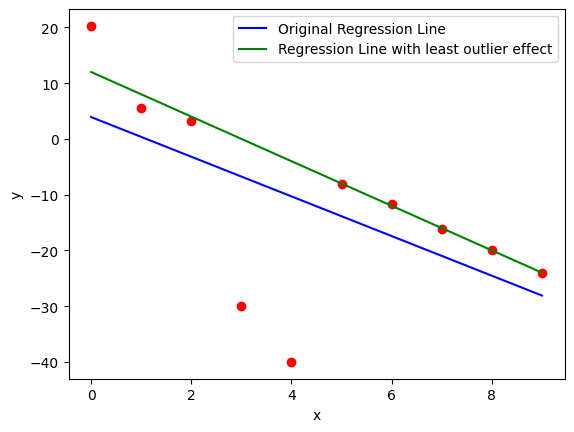

In [ ]:
plt.scatter(data.x, data.y, color='red')
m, c = model.coef_, model.intercept_
plt.plot(x, m*x + c, color='blue', label='Original Regression Line')
plt.plot(x, -4*x + 12, color='green', label='Regression Line with least outlier effect')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()  # This will display the labels
plt.show()


# 2 Loss Function

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# True label
y_true = 1

# Predictions
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Compute Mean Squared Error (MSE)
mse = (y_true - y_pred)**2

# Compute Binary Cross Entropy (BCE)
# Adding a small epsilon to avoid log(0)
epsilon = 1e-15
bce = -(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Create a DataFrame for display
df = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'MSE': mse,
    'BCE': bce
})

print("Table 2: MSE and BCE loss values for different predictions when y=1")
display(df)

Table 2: MSE and BCE loss values for different predictions when y=1


,y_true,y_pred,MSE,BCE
0,1,0.005,0.990025,5.298317e+00
1,1,0.010,0.980100,4.605170e+00
2,1,0.050,0.902500,2.995732e+00
3,1,0.100,0.810000,2.302585e+00
4,1,0.200,0.640000,1.609438e+00
5,1,0.300,0.490000,1.203973e+00
6,1,0.400,0.360000,9.162907e-01
7,1,0.500,0.250000,6.931472e-01
8,1,0.600,0.160000,5.108256e-01
9,1,0.700,0.090000,3.566749e-01


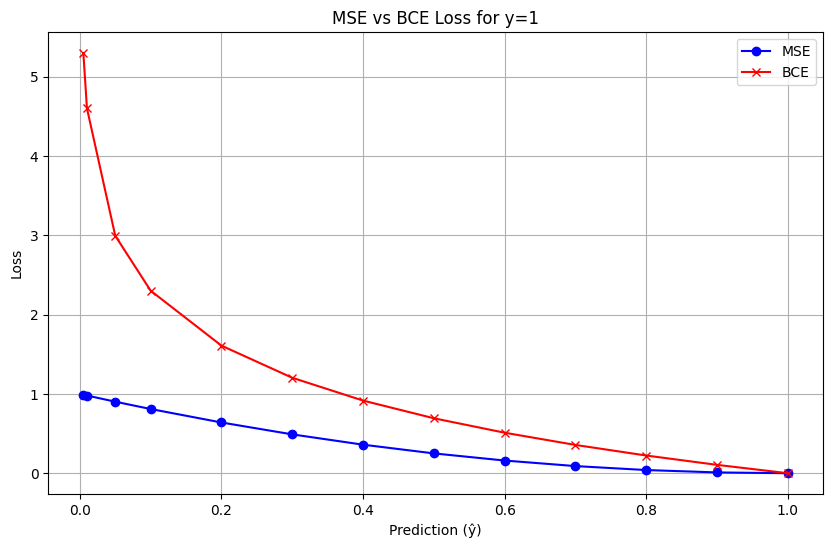

In [ ]:
# Plot both loss functions
plt.figure(figsize=(10,6))
plt.plot(y_pred, mse, marker='o', label='MSE', color='blue')
plt.plot(y_pred, bce, marker='x', label='BCE', color='red')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss')
plt.title('MSE vs BCE Loss for y=1')
plt.legend()
plt.grid(True)
plt.show()


Table: MSE and BCE loss values for different predictions when y=1


,y_true,y_pred,MSE,BCE
0,1.0,0.005,0.990025,5.298317e+00
1,1.0,0.010,0.980100,4.605170e+00
2,1.0,0.050,0.902500,2.995732e+00
3,1.0,0.100,0.810000,2.302585e+00
4,1.0,0.200,0.640000,1.609438e+00
5,1.0,0.300,0.490000,1.203973e+00
6,1.0,0.400,0.360000,9.162907e-01
7,1.0,0.500,0.250000,6.931472e-01
8,1.0,0.600,0.160000,5.108256e-01
9,1.0,0.700,0.090000,3.566750e-01


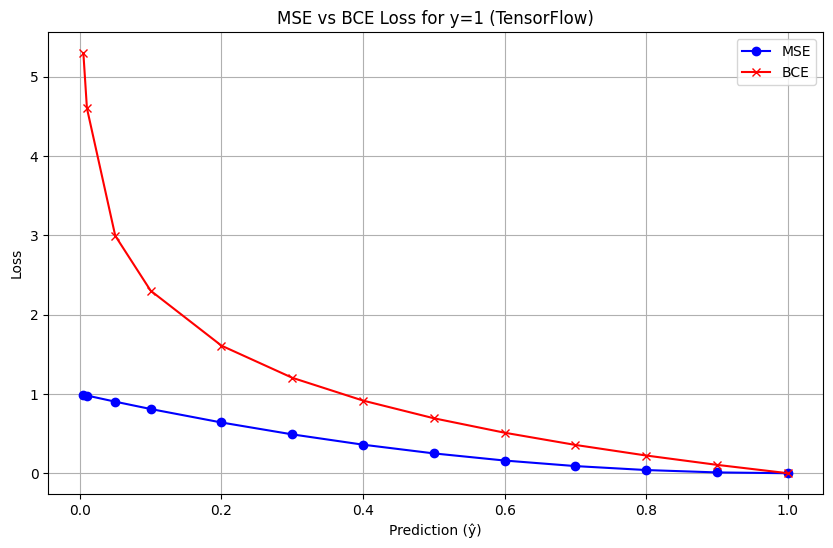

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# True label
y_true = np.array([1]*13, dtype=np.float32)

# Predictions
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], dtype=np.float32)

# Convert to tensors
y_true_tf = tf.constant(y_true)
y_pred_tf = tf.constant(y_pred)

# Compute MSE and BCE for each prediction individually
mse_values = []
bce_values = []

for yt, yp in zip(y_true_tf, y_pred_tf):
    mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)([yt], [yp]).numpy()
    bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)([yt], [yp]).numpy()
    mse_values.append(mse)
    bce_values.append(bce)

mse_values = np.array(mse_values)
bce_values = np.array(bce_values)

# Create a DataFrame
df = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'MSE': mse_values,
    'BCE': bce_values
})

print("Table: MSE and BCE loss values for different predictions when y=1")
display(df)

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_pred, mse_values, marker='o', label='MSE', color='blue')
plt.plot(y_pred, bce_values, marker='x', label='BCE', color='red')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss')
plt.title('MSE vs BCE Loss for y=1 (TensorFlow)')
plt.legend()
plt.grid(True)
plt.show()


# 3 Data Pre-Processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [ ]:
# -----------------------------
# Step 1: Generate the features
# -----------------------------
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100
num_nonzero = 10
your_index_no = 220065

# Feature 1: sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

# Feature 2: random noise
epsilon = np.random.normal(0, 15, signal_length)

# Combine features for scaling
X = np.vstack([sparse_signal, epsilon]).T  # shape: (100, 2)

In [ ]:
# -----------------------------
# Step 2: Apply Scaling Methods
# -----------------------------
# Standard Scaling (mean=0, std=1)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

# Min-Max Scaling (scale to [0,1])
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# Max-Abs Scaling (scale to [-1,1] preserving sparsity)
maxabs_scaler = MaxAbsScaler()
X_maxabs = maxabs_scaler.fit_transform(X)



In [ ]:
# -----------------------------
# Step 3: Choose appropriate scaling
# -----------------------------
# Feature 1 is sparse (mostly zeros) -> Max-Abs scaling preserves zeros and sparsity
# Feature 2 is noise with both positive and negative values -> Standard scaling preserves distribution

X_scaled = np.zeros_like(X)
X_scaled[:,0] = MaxAbsScaler().fit_transform(X[:,0].reshape(-1,1)).flatten()
X_scaled[:,1] = StandardScaler().fit_transform(X[:,1].reshape(-1,1)).flatten()



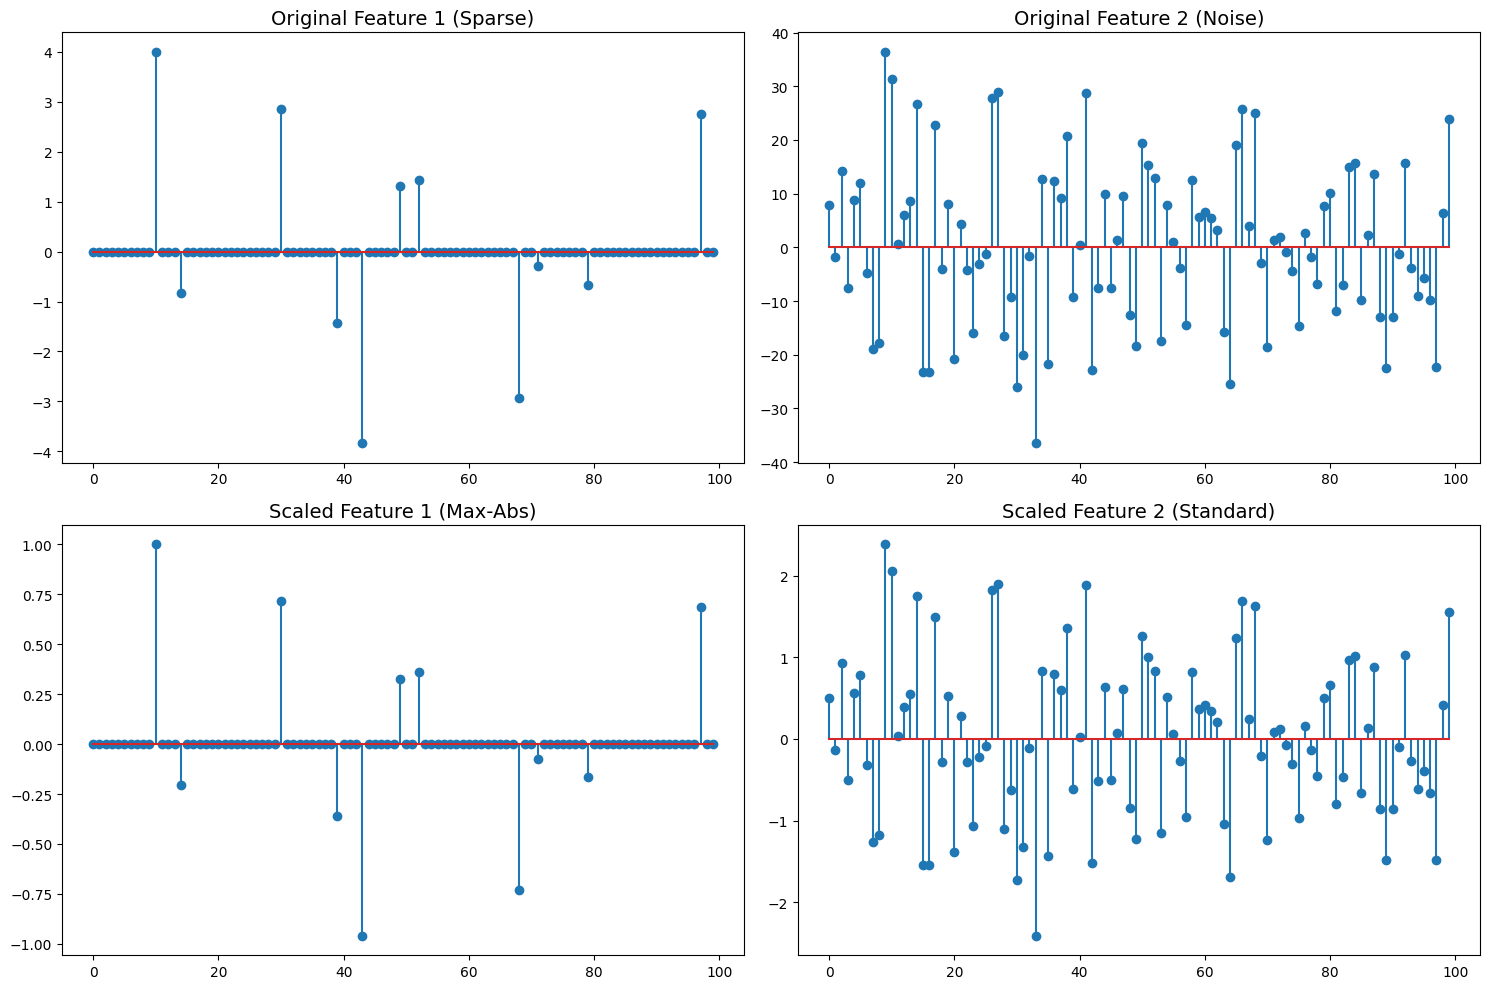

In [ ]:
# -----------------------------
# Step 4: Plot the features
# -----------------------------
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title("Original Feature 1 (Sparse)", fontsize=14)
plt.stem(X[:,0])
plt.subplot(2, 2, 2)
plt.title("Original Feature 2 (Noise)", fontsize=14)
plt.stem(X[:,1])

plt.subplot(2, 2, 3)
plt.title("Scaled Feature 1 (Max-Abs)", fontsize=14)
plt.stem(X_scaled[:,0])
plt.subplot(2, 2, 4)
plt.title("Scaled Feature 2 (Standard)", fontsize=14)
plt.stem(X_scaled[:,1])

plt.tight_layout()
plt.show()

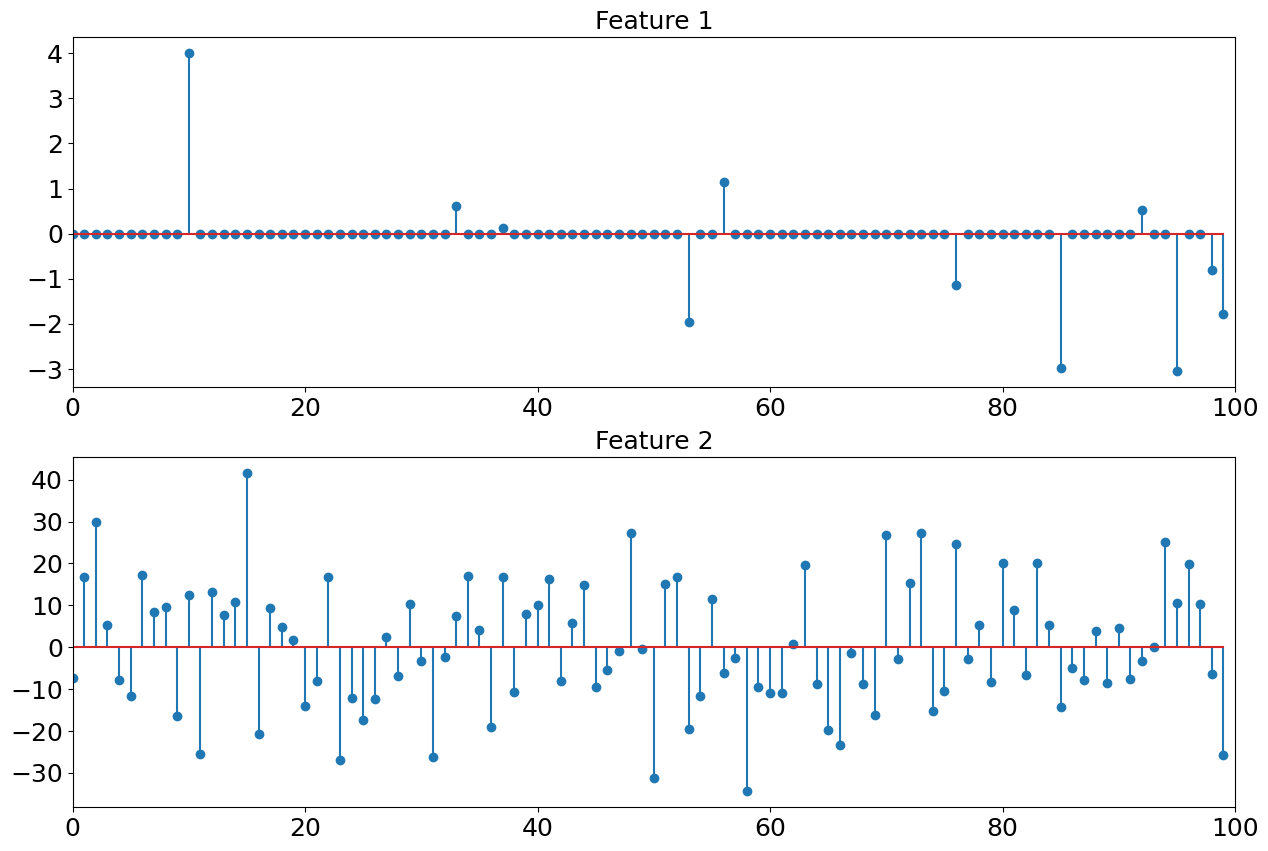

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10*np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal
your_index_no=220065 # Enter your index no without english letters and without leading zeros

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal/5

epsilon = np.random.normal(0, 15, signal_length )
#epsilon=epsilon[:, np.newaxis]

plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()